In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean

In [126]:
df1 = pd.read_csv("https://github.com/mslev/ds4a/raw/main/data/mort2000_pp.csv")
df2 = pd.read_csv("https://github.com/mslev/ds4a/raw/main/data/mort2001_pp.csv")
df3 = pd.read_csv("https://github.com/mslev/ds4a/raw/main/data/mort2002_pp.csv")
df4 = pd.read_csv("https://github.com/mslev/ds4a/raw/main/data/mort2003_pp.csv")
df5 = pd.read_csv("https://github.com/mslev/ds4a/raw/main/data/mort2004_pp.csv")

In [127]:
df = pd.concat([df1, df2, df3, df4, df5])
del df['Unnamed: 0']
df.tail()

,rectype,restatus,stateoc,countyoc,region,divstoc,exstatoc,staters,countyrs,cityrs,...,category,statersr,cmsares,statbthr,educ89,educflag,methdisp,autopsy,brace,racer5
693,1,1,WI,WI999,NaN,NaN,WI,WI,WI999,99999,...,O,WI,0.0,WI,11.0,0.0,U,Y,NaN,1.0
694,2,2,WI,WI009,NaN,NaN,WI,WI,WI999,99999,...,O,WI,0.0,IL,14.0,0.0,U,N,NaN,1.0
695,1,1,WI,WI087,NaN,NaN,WI,WI,WI087,99999,...,O,WI,0.0,IL,16.0,0.0,U,Y,NaN,1.0
696,1,1,WI,WI999,NaN,NaN,WI,WI,WI999,99999,...,O,WI,0.0,WI,12.0,0.0,U,Y,NaN,1.0
697,1,1,WV,WV999,NaN,NaN,WV,WV,WV999,99999,...,O,WV,0.0,WV,16.0,0.0,U,N,NaN,1.0


In [128]:
print(df.columns.tolist())

['rectype', 'restatus', 'stateoc', 'countyoc', 'region', 'divstoc', 'exstatoc', 'staters', 'countyrs', 'cityrs', 'popsize', 'metro', 'regnres', 'divstres', 'exstares', 'pmsares', 'popsizoc', 'popsizrs', 'popmsa', 'educ', 'educr', 'monthdth', 'sex', 'race', 'racer3', 'racer2', 'age', 'ager52', 'ager27', 'ager12', 'ager22', 'placdth', 'marstat', 'statbth', 'hispanic', 'hspanicr', 'weekday', 'fipscity', 'year', 'fipssto', 'fipsctyo', 'fipsstr', 'fipsctyr', 'fipspmsa', 'fipscmsa', 'injwork', 'raceimp', 'ageflag', 'mandeath', 'activity', 'injury', 'ucod', 'ucr358', 'ucr113', 'ucr130', 'ucr39', 'eanum', 'econdp_1', 'econds_1', 'enicon_1', 'econdp_2', 'econds_2', 'enicon_2', 'econdp_3', 'econds_3', 'enicon_3', 'econdp_4', 'econds_4', 'enicon_4', 'econdp_5', 'econds_5', 'enicon_5', 'econdp_6', 'econds_6', 'enicon_6', 'econdp_7', 'econds_7', 'enicon_7', 'econdp_8', 'econds_8', 'enicon_8', 'econdp_9', 'econds_9', 'enicon_9', 'econdp_10', 'econds_10', 'enicon_10', 'econdp_11', 'econds_11', 'enico

In [129]:
df['restatus'].value_counts()

1    1839
2     517
3      85
4       8
Name: restatus, dtype: int64

In [130]:
df.loc[df['restatus'] == 1, 'restatus'] = "Residents"
df.loc[df['restatus'] == 2, 'restatus'] = "Intrastate Nonresidents"
df.loc[df['restatus'] == 3, 'restatus'] = "Interstate Nonresidents"
df.loc[df['restatus'] == 4, 'restatus'] = "Foreign Residents"
df['restatus'].value_counts()

Residents                  1839
Intrastate Nonresidents     517
Interstate Nonresidents      85
Foreign Residents             8
Name: restatus, dtype: int64

In [131]:
df['educ1989'] = df['educ89']
df['educ1989'].value_counts()

12.0    250
14.0     85
16.0     69
99.0     65
13.0     50
11.0     41
17.0     31
10.0     31
9.0      22
15.0     19
6.0      13
8.0      12
0.0       4
7.0       3
4.0       3
3.0       1
Name: educ1989, dtype: int64

In [132]:
df.loc[df['educ1989'] == 0, 'educ1989'] = "No formal education"
df.loc[df['educ1989'] == 3, 'educ1989'] = "3 Years of elementary school"
df.loc[df['educ1989'] == 4, 'educ1989'] = "4 Years of elementary school"
df.loc[df['educ1989'] == 6, 'educ1989'] = "6 Years of elementary school"
df.loc[df['educ1989'] == 7, 'educ1989'] = "7 Years of elementary school"
df.loc[df['educ1989'] == 8, 'educ1989'] = "8 Years of elementary school"
df.loc[df['educ1989'] == 9, 'educ1989'] = "1 year of high school"
df.loc[df['educ1989'] == 10, 'educ1989'] = "2 years of high school"
df.loc[df['educ1989'] == 11, 'educ1989'] = "3 years of high school"
df.loc[df['educ1989'] == 12, 'educ1989'] = "4 years of high school"
df.loc[df['educ1989'] == 13, 'educ1989'] = "1 year of college"
df.loc[df['educ1989'] == 14, 'educ1989'] = "2 years of college"
df.loc[df['educ1989'] == 15, 'educ1989'] = "3 years of college"
df.loc[df['educ1989'] == 16, 'educ1989'] = "4 years of college"
df.loc[df['educ1989'] == 17, 'educ1989'] = "5 or more years of college"
df.loc[df['educ1989'] == 99, 'educ1989'] = "Not stated"
df['educ1989'].value_counts()

4 years of high school          250
2 years of college               85
4 years of college               69
Not stated                       65
1 year of college                50
3 years of high school           41
2 years of high school           31
5 or more years of college       31
1 year of high school            22
3 years of college               19
6 Years of elementary school     13
8 Years of elementary school     12
No formal education               4
4 Years of elementary school      3
7 Years of elementary school      3
3 Years of elementary school      1
Name: educ1989, dtype: int64

In [133]:
df['educ2003'] = df['educr']

In [134]:
df['educ2003'].value_counts()
df.loc[df['educ2003'] == 1, 'educ2003'] = "8th grade or less"
df.loc[df['educ2003'] == 2, 'educ2003'] = "9 - 12th grade, no diploma"
df.loc[df['educ2003'] == 3, 'educ2003'] = "high school graduate or GED completed"
df.loc[df['educ2003'] == 4, 'educ2003'] = "some college credit, but no degree"
df.loc[df['educ2003'] == 5, 'educ2003'] = "Associate degree"
df.loc[df['educ2003'] == 6, 'educ2003'] = "Bachelor’s degree"
df.loc[df['educ2003'] == 7, 'educ2003'] = "Master’s degree"
df.loc[df['educ2003'] == 8, 'educ2003'] = "Doctorate or professional degree"
df.loc[df['educ2003'] == 9, 'educ2003'] = "Unknown"
df['educ2003'].value_counts()

high school graduate or GED completed    453
some college credit, but no degree       214
9 - 12th grade, no diploma               184
Associate degree                         170
Bachelor’s degree                        115
8th grade or less                         67
Name: educ2003, dtype: int64

In [135]:
df['ager52'].value_counts()
df.loc[df['ager52'] == 28, 'ager52'] = "10 - 14 years"
df.loc[df['ager52'] == 29, 'ager52'] = "15 - 19 years"
df.loc[df['ager52'] == 30, 'ager52'] = "20 - 24 years"
df.loc[df['ager52'] == 31, 'ager52'] = "25 - 29 years"
df.loc[df['ager52'] == 32, 'ager52'] = "30 - 34 years"
df.loc[df['ager52'] == 33, 'ager52'] = "35 - 39 years"
df.loc[df['ager52'] == 34, 'ager52'] = "40 - 44 years"
df.loc[df['ager52'] == 35, 'ager52'] = "45 - 49 years"
df.loc[df['ager52'] == 36, 'ager52'] = "50 - 54 years"
df.loc[df['ager52'] == 37, 'ager52'] = "55 - 59 years"
df.loc[df['ager52'] == 38, 'ager52'] = "60 - 64 years"
df.loc[df['ager52'] == 39, 'ager52'] = "65 - 69 years"
df.loc[df['ager52'] == 40, 'ager52'] = "70 - 74 years"
df.loc[df['ager52'] == 41, 'ager52'] = "75 - 79 years"
df.loc[df['ager52'] == 43, 'ager52'] = "85 - 89 years"
df.loc[df['ager52'] == 44, 'ager52'] = "90 - 94 years"
df.loc[df['ager52'] == 45, 'ager52'] = "95 - 99 years"
df.loc[df['ager52'] == 52, 'ager52'] = "Age not stated"
df['ager52'].value_counts()


30 - 34 years    552
25 - 29 years    515
35 - 39 years    441
20 - 24 years    431
40 - 44 years    216
15 - 19 years    147
45 - 49 years     77
50 - 54 years     54
10 - 14 years      7
55 - 59 years      3
75 - 79 years      2
65 - 69 years      1
70 - 74 years      1
95 - 99 years      1
90 - 94 years      1
Name: ager52, dtype: int64

In [136]:
df['ager27'].value_counts()
df.loc[df['ager27'] == 8, 'ager27'] = "10 - 14 years"
df.loc[df['ager27'] == 9, 'ager27'] = "15 - 19 years"
df.loc[df['ager27'] == 10, 'ager27'] = "20 - 24 years"
df.loc[df['ager27'] == 11, 'ager27'] = "25 - 29 years"
df.loc[df['ager27'] == 12, 'ager27'] = "30 - 34 years"
df.loc[df['ager27'] == 13, 'ager27'] = "35 - 39 years"
df.loc[df['ager27'] == 14, 'ager27'] = "40 - 44 years"
df.loc[df['ager27'] == 15, 'ager27'] = "45 - 49 years"
df.loc[df['ager27'] == 16, 'ager27'] = "50 - 54 years"
df.loc[df['ager27'] == 17, 'ager27'] = "55 - 59 years"
df.loc[df['ager27'] == 18, 'ager27'] = "60 - 64 years"
df.loc[df['ager27'] == 19, 'ager27'] = "65 - 69 years"
df.loc[df['ager27'] == 20, 'ager27'] = "70 - 74 years"
df.loc[df['ager27'] == 21, 'ager27'] = "75 - 79 years"
df.loc[df['ager27'] == 23, 'ager27'] = "85 - 89 years"
df.loc[df['ager27'] == 24, 'ager27'] = "90 -94 years"
df.loc[df['ager27'] == 25, 'ager27'] = "95 - 99 years"
df.loc[df['ager27'] == 27, 'ager27'] = "Age not stated"
df['ager27'].value_counts()

30 - 34 years    552
25 - 29 years    515
35 - 39 years    441
20 - 24 years    431
40 - 44 years    216
15 - 19 years    147
45 - 49 years     77
50 - 54 years     54
10 - 14 years      7
55 - 59 years      3
75 - 79 years      2
65 - 69 years      1
90 -94 years       1
70 - 74 years      1
95 - 99 years      1
Name: ager27, dtype: int64

In [137]:
df['ager12'].value_counts()
df.loc[df['ager12'] == 3, 'ager12'] = "5 - 14 years"
df.loc[df['ager12'] == 4, 'ager12'] = "15 - 24 years"
df.loc[df['ager12'] == 5, 'ager12'] = "25 - 34 years"
df.loc[df['ager12'] == 6, 'ager12'] = "35 - 44 years"
df.loc[df['ager12'] == 7, 'ager12'] = "45 - 54 years"
df.loc[df['ager12'] == 8, 'ager12'] = "55 - 64 years"
df.loc[df['ager12'] == 9, 'ager12'] = "65 - 74 years"
df.loc[df['ager12'] == 10, 'ager12'] = "75 - 84 years"
df.loc[df['ager12'] == 11, 'ager12'] = "85 years and over"
df.loc[df['ager12'] == 12, 'ager12'] = "Age not stated"
df['ager12'].value_counts()

25 - 34 years        1067
35 - 44 years         657
15 - 24 years         578
45 - 54 years         131
5 - 14 years            7
55 - 64 years           3
85 years and over       2
65 - 74 years           2
75 - 84 years           2
Name: ager12, dtype: int64

In [138]:
df['placdth'].value_counts()
df.loc[df['placdth'] == 1, 'placdth'] = "Hospital, clinic or Medical Center - Inpatient"
df.loc[df['placdth'] == 2, 'placdth'] = "Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room"
df.loc[df['placdth'] == 3, 'placdth'] = "Hospital, Clinic or Medical Center- Dead on Arrival"
df.loc[df['placdth'] == 4, 'placdth'] = "Decedent’s home"
df.loc[df['placdth'] == 5, 'placdth'] = "Hospice facility"
df.loc[df['placdth'] == 6, 'placdth'] = "Nursing home/long term care"
df.loc[df['placdth'] == 7, 'placdth'] = "Other"
df.loc[df['placdth'] == 9, 'placdth'] = "Place of death unknown"
df['placdth'].value_counts()


Hospital, clinic or Medical Center - Inpatient                                   1546
Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room     502
Decedent’s home                                                                   166
Nursing home/long term care                                                        99
Hospital, Clinic or Medical Center- Dead on Arrival                                63
Other                                                                              57
Hospice facility                                                                   11
Place of death unknown                                                              5
Name: placdth, dtype: int64

In [139]:
df['marstat'].value_counts()

2    642
M    618
S    495
1    462
D    120
4     82
3     12
W     11
9      5
U      2
Name: marstat, dtype: int64

In [140]:
df['marstat'].value_counts()
df.loc[df['marstat'] == "M", 'marstat'] = "Married"
df.loc[df['marstat'] == "S", 'marstat'] = "Never married, single"
df.loc[df['marstat'] == "D", 'marstat'] = "Divorced"
df.loc[df['marstat'] == "W", 'marstat'] = "Widowed"
df.loc[df['marstat'] == "U", 'marstat'] = "Marital Status unknown"
df.loc[df['marstat'] == 2, 'marstat'] = "Married"
df.loc[df['marstat'] == 1, 'marstat'] = "Never married, single"
df.loc[df['marstat'] == 4, 'marstat'] = "Divorced"
df.loc[df['marstat'] == 3, 'marstat'] = "Widowed"
df.loc[df['marstat'] == 9, 'marstat'] = "Marital Status unknown"
df['marstat'].value_counts()

Married                   1260
Never married, single      957
Divorced                   202
Widowed                     23
Marital Status unknown       7
Name: marstat, dtype: int64

In [141]:
df['mandeath'].value_counts()
df.loc[df['mandeath'] == 1, 'mandeath'] = "Accident"
df.loc[df['mandeath'] == 2, 'mandeath'] = "Suicide"
df.loc[df['mandeath'] == 3, 'mandeath'] = "Homicide"
df.loc[df['mandeath'] == 4, 'mandeath'] = "Pending investigation"
df.loc[df['mandeath'] == 5, 'mandeath'] = "Could not determine"
df.loc[df['mandeath'] == 7, 'mandeath'] = "Natural"
df['mandeath'].value_counts()

Natural                  1580
Accident                   80
Pending investigation      37
Could not determine        26
Homicide                    4
Suicide                     2
Name: mandeath, dtype: int64

In [142]:
df['ucod'].value_counts()

O96     211
O881    175
O268    164
O998    159
O903    150
       ... 
O709      1
O365      1
O263      1
O419      1
O871      1
Name: ucod, Length: 150, dtype: int64

In [143]:
icd_codes = pd.read_csv("additional_codes.csv", sep=',', names=['ucod', 'description'])
df = pd.merge(df, icd_codes,how='left', on='ucod')

In [144]:
df.loc[df['description'].isna()]

,rectype,restatus,stateoc,countyoc,region,divstoc,exstatoc,staters,countyrs,cityrs,...,statbthr,educ89,educflag,methdisp,autopsy,brace,racer5,educ1989,educ2003,description


In [145]:
df['description'].value_counts()

Other complications of birth; puerperium affecting management of mother                         1136
Other complications of pregnancy                                                                 596
Hypertension complicating pregnancy; childbirth and the puerperium                               348
Hemorrhage during pregnancy; abruptio placenta; placenta previa                                  114
Ectopic pregnancy                                                                                 98
Induced abortion                                                                                  40
Diabetes or abnormal glucose tolerance complicating pregnancy; childbirth; or the puerperium      26
Spontaneous abortion                                                                              24
Complications of surgical procedures or medical care                                              23
Fetal distress and abnormal forces of labor                                                

In [146]:
#Getting recode info from https://www.cdc.gov/nchs/data/datalinkage/underlying_and_multiple_cause_of_death_codes.pdf
df['ucr358'].value_counts()
df.loc[df['ucr358'] == 341, 'ucr358'] = "Ectopic pregnancy"
df.loc[df['ucr358'] == 342, 'ucr358'] = "Spontaneous abortion"
df.loc[df['ucr358'] == 343, 'ucr358'] = "Medical abortion"
df.loc[df['ucr358'] == 344, 'ucr358'] = "Other abortion"
df.loc[df['ucr358'] == 345, 'ucr358'] = "Other and unspecified pregnancy with abortive outcome"
df.loc[df['ucr358'] == 347, 'ucr358'] = "Eclampsia and pre-eclampsia"
df.loc[df['ucr358'] == 348, 'ucr358'] = "Hemorrhage of pregnancy and childbirth and placenta previa"
df.loc[df['ucr358'] == 350, 'ucr358'] = "Obstetric embolism"
df.loc[df['ucr358'] == 351, 'ucr358'] = "Other complications predominately related to the puerperium"
df.loc[df['ucr358'] == 352, 'ucr358'] = "All other direct obstetric causes"
df.loc[df['ucr358'] == 353, 'ucr358'] = "Obstetric death of unspecified cause"
df.loc[df['ucr358'] == 354, 'ucr358'] = "Other deaths related to pregnancy, childbirth and the puerperium"
df.loc[df['ucr358'] == 355, 'ucr358'] = "Indirect obstetric deaths"
df['ucr358'].value_counts()

All other direct obstetric causes                                   604
Indirect obstetric deaths                                           380
Eclampsia and pre-eclampsia                                         322
Obstetric embolism                                                  272
Other deaths related to pregnancy, childbirth and the puerperium    254
Other complications predominately related to the puerperium         197
Hemorrhage of pregnancy and childbirth and placenta previa          187
Ectopic pregnancy                                                    98
Obstetric death of unspecified cause                                 63
Other and unspecified pregnancy with abortive outcome                38
Spontaneous abortion                                                 24
Medical abortion                                                     10
Name: ucr358, dtype: int64

In [147]:
#"The record axis codes represent a further processing of the entity axis codes to be consistent with the underlying cause data and more amenable to statistical tabulation and analysis."
#From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC548504/
df['ranum'].value_counts() #Keep up to 3 record axis conditions

1    1340
2     693
3     271
4      97
5      33
6       9
7       5
8       1
Name: ranum, dtype: int64

In [148]:
check = (df['ucod'] == df['record_1'])
check.value_counts() #the first record (record_1) is GENERALLY (~77% of cases) equal to the official cause of death. which means if I want other undelying conditions, I need to keep records 2, 3 and 4
check = df[df['ucod'] != df['record_1']]
check[['ucod', 'record_1', 'record_2']] 

,ucod,record_1,record_2
6,O903,J189,O903
7,O883,O342,O883
8,O759,O082,O96
16,O751,O721,O722
21,O881,O001,O881
...,...,...,...
2409,O881,O268,O364
2418,O039,N838,O009
2419,O459,O100,O459
2425,O85,O723,O85


In [149]:
icd_codes.rename(columns={"ucod": "record_2", "description": "record_2_desc"}, inplace =True)
df = pd.merge(df, icd_codes, how='left', on='record_2') 

In [150]:
icd_codes.rename(columns={"record_2": "record_3", "record_2_desc": "record_3_desc"}, inplace =True)
df = pd.merge(df, icd_codes, how='left', on='record_3') 

In [151]:
icd_codes.rename(columns={"record_3": "record_4", "record_3_desc": "record_4_desc"}, inplace =True)
df = pd.merge(df, icd_codes, how='left', on='record_4') 

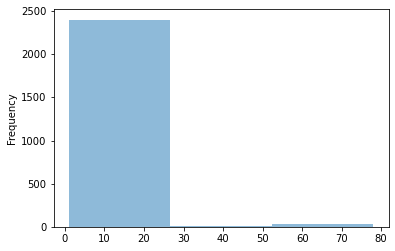

In [152]:
ax = df['race'].plot.hist(bins=3, alpha=0.5)

In [153]:
df['racer3'].value_counts()
df.loc[df['racer3'] == 1, 'racer3'] = "White"
df.loc[df['racer3'] == 2, 'racer3'] = "Races other than White or Black"
df.loc[df['racer3'] == 3, 'racer3'] = "Black"
df['racer3'].value_counts()

White                              1415
Black                               901
Races other than White or Black     133
Name: racer3, dtype: int64

In [154]:
df['racer5'].value_counts()
df.loc[df['racer5'] == 1, 'racer5'] = "White"
df.loc[df['racer5'] == 2, 'racer5'] = "Black"
df.loc[df['racer5'] == 3, 'racer5'] = "American Indian"
df.loc[df['racer5'] == 4, 'racer5'] = "Asian or Pacific Islander"
df['racer5'].value_counts()

White                        412
Black                        251
Asian or Pacific Islander     29
American Indian                6
Name: racer5, dtype: int64

In [155]:
df['hspanicr'].value_counts()
df.loc[df['hspanicr'] == 9, 'hspanicr'] = "Hispanic origin unknown"
df.loc[df['hspanicr'] == 8, 'hspanicr'] = "Non - Hispanic other races"
df.loc[df['hspanicr'] == 7, 'hspanicr'] = "Non - Hispanic black"
df.loc[df['hspanicr'] == 6, 'hspanicr'] = "Non - Hispanic white"
df.loc[df['hspanicr'] == 5, 'hspanicr'] = "Hispanic"
df.loc[df['hspanicr'] == 4, 'hspanicr'] = "Hispanic"
df.loc[df['hspanicr'] == 3, 'hspanicr'] = "Hispanic"
df.loc[df['hspanicr'] == 2, 'hspanicr'] = "Hispanic"
df.loc[df['hspanicr'] == 1, 'hspanicr'] = "Hispanic"
df['hspanicr'].value_counts()


Non - Hispanic white          967
Non - Hispanic black          881
Hispanic                      460
Non - Hispanic other races    130
Hispanic origin unknown        11
Name: hspanicr, dtype: int64

In [156]:
df['stateoc'].value_counts()

CA    247
5     161
NY    135
TX    110
44    107
     ... 
20      1
HI      1
46      1
AK      1
51      1
Name: stateoc, Length: 100, dtype: int64

In [157]:
df.loc[df['stateoc'] == 1 ,'stateoc'] = 'AL'
df.loc[df['stateoc'] == 2 ,'stateoc'] = 'AK'
df.loc[df['stateoc'] == 3 ,'stateoc'] = 'AZ'
df.loc[df['stateoc'] == 4 ,'stateoc'] = 'AR'
df.loc[df['stateoc'] == 5 ,'stateoc'] = 'CA'
df.loc[df['stateoc'] == 6 ,'stateoc'] = 'CO'
df.loc[df['stateoc'] == 7 ,'stateoc'] = 'CT'
df.loc[df['stateoc'] == 8 ,'stateoc'] = 'DE'
df.loc[df['stateoc'] == 9 ,'stateoc'] = 'DC'
df.loc[df['stateoc'] == 10 ,'stateoc'] = 'FL'
df.loc[df['stateoc'] == 11 ,'stateoc'] = 'GA'
df.loc[df['stateoc'] == 12 ,'stateoc'] = 'HI'
df.loc[df['stateoc'] == 13 ,'stateoc'] = 'ID'
df.loc[df['stateoc'] == 14 ,'stateoc'] = 'IL'
df.loc[df['stateoc'] == 15 ,'stateoc'] = 'IN'
df.loc[df['stateoc'] == 16 ,'stateoc'] = 'IA'
df.loc[df['stateoc'] == 17 ,'stateoc'] = 'KS'
df.loc[df['stateoc'] == 18 ,'stateoc'] = 'KY'
df.loc[df['stateoc'] == 19 ,'stateoc'] = 'LA'
df.loc[df['stateoc'] == 20 ,'stateoc'] = 'ME'
df.loc[df['stateoc'] == 21 ,'stateoc'] = 'MD'
df.loc[df['stateoc'] == 22 ,'stateoc'] = 'MA'
df.loc[df['stateoc'] == 23 ,'stateoc'] = 'MI'
df.loc[df['stateoc'] == 24 ,'stateoc'] = 'MN'
df.loc[df['stateoc'] == 25 ,'stateoc'] = 'MS'
df.loc[df['stateoc'] == 26 ,'stateoc'] = 'MO'
df.loc[df['stateoc'] == 27 ,'stateoc'] = 'MT'
df.loc[df['stateoc'] == 28 ,'stateoc'] = 'NE'
df.loc[df['stateoc'] == 29 ,'stateoc'] = 'NV'
df.loc[df['stateoc'] == 30 ,'stateoc'] = 'NH'
df.loc[df['stateoc'] == 31 ,'stateoc'] = 'NJ'
df.loc[df['stateoc'] == 32 ,'stateoc'] = 'NM'
df.loc[df['stateoc'] == 33 ,'stateoc'] = 'NY'
df.loc[df['stateoc'] == 34 ,'stateoc'] = 'NC'
df.loc[df['stateoc'] == 35 ,'stateoc'] = 'ND'
df.loc[df['stateoc'] == 36 ,'stateoc'] = 'OH'
df.loc[df['stateoc'] == 37 ,'stateoc'] = 'OK'
df.loc[df['stateoc'] == 38 ,'stateoc'] = 'OR'
df.loc[df['stateoc'] == 39 ,'stateoc'] = 'PA'
df.loc[df['stateoc'] == 40 ,'stateoc'] = 'RI'
df.loc[df['stateoc'] == 41 ,'stateoc'] = 'SC'
df.loc[df['stateoc'] == 42 ,'stateoc'] = 'SD'
df.loc[df['stateoc'] == 43 ,'stateoc'] = 'TN'
df.loc[df['stateoc'] == 44 ,'stateoc'] = 'TX'
df.loc[df['stateoc'] == 45 ,'stateoc'] = 'UT'
df.loc[df['stateoc'] == 46 ,'stateoc'] = 'VT'
df.loc[df['stateoc'] == 47 ,'stateoc'] = 'VA'
df.loc[df['stateoc'] == 48 ,'stateoc'] = 'WA'
df.loc[df['stateoc'] == 49 ,'stateoc'] = 'WV'
df.loc[df['stateoc'] == 50 ,'stateoc'] = 'WI'
df.loc[df['stateoc'] == 51 ,'stateoc'] = 'WY'
df.loc[df['stateoc'] == 52 ,'stateoc'] = 'PR'
df.loc[df['stateoc'] == 53 ,'stateoc'] = 'VI'
df.loc[df['stateoc'] == 54 ,'stateoc'] = 'GU'
df.loc[df['stateoc'] == 61 ,'stateoc'] = 'AS'
df.loc[df['stateoc'] == 62 ,'stateoc'] = 'MP'
df['stateoc'].value_counts()

CA    408
NY    226
TX    217
GA    143
FL    134
MI    103
IL     80
NJ     79
MD     73
NC     66
PA     61
OH     60
LA     60
TN     49
MS     48
MO     43
CO     39
WA     38
VA     36
OK     36
WI     35
AZ     32
KY     27
SC     25
NM     25
AR     24
DC     23
AL     23
UT     21
MT     20
OR     16
ID     15
IN     15
NV     15
IA     15
NE     14
MN     12
WV     11
MA     11
CT     11
NH     10
KS     10
DE      9
SD      6
RI      6
ND      5
WY      4
HI      4
AK      3
VT      2
ME      1
Name: stateoc, dtype: int64

In [167]:
print("Total Regions: ", len(df['stateoc'].value_counts()))
print("Total Rows: ", len(df['stateoc']))
df['stateoc'].value_counts().head(6) # 1,231
print("Six states/regions out of 51 make up ", round(1231/2449*100, 2) ,"% of all deaths")
print("So ", round(6/51*100, 0) ,"% of regions make up 50% of deaths")

Total Regions:  51
Total Rows:  2449
Six states/regions out of 51 make up  50.27 % of all deaths
So  12.0 % of regions make up 50% of deaths


In [168]:
df = df[['restatus', 'stateoc', 'educ1989', 'educ2003', 'educflag', 'monthdth', 'sex', 'ager52', 'ager27', 'ager12', 'placdth', 'marstat', 'weekday', 'year', 'injwork', 'mandeath', 'ucod', 'ucr358', 'ranum', 'record_2', 'record_3', 'record_4', 'racer3', 'racer5', 'hspanicr', 'description', 'record_2_desc', 'record_3_desc', 'record_4_desc']].copy()
df

,restatus,stateoc,educ1989,educ2003,educflag,monthdth,sex,ager52,ager27,ager12,...,record_2,record_3,record_4,racer3,racer5,hspanicr,description,record_2_desc,record_3_desc,record_4_desc
0,Residents,AL,NaN,high school graduate or GED completed,NaN,4,2,25 - 29 years,25 - 29 years,25 - 34 years,...,O268,NaN,NaN,Black,NaN,Non - Hispanic black,Other complications of pregnancy,Other complications of pregnancy,NaN,NaN
1,Residents,AL,NaN,"9 - 12th grade, no diploma",NaN,5,2,20 - 24 years,20 - 24 years,15 - 24 years,...,NaN,NaN,NaN,White,NaN,Non - Hispanic white,Other complications of pregnancy,NaN,NaN,NaN
2,Residents,AL,NaN,"9 - 12th grade, no diploma",NaN,7,2,30 - 34 years,30 - 34 years,25 - 34 years,...,NaN,NaN,NaN,Black,NaN,Non - Hispanic black,Other complications of birth; puerperium affec...,NaN,NaN,NaN
3,Residents,AK,NaN,high school graduate or GED completed,NaN,3,2,35 - 39 years,35 - 39 years,35 - 44 years,...,NaN,NaN,NaN,White,NaN,Non - Hispanic white,Spontaneous abortion,NaN,NaN,NaN
4,Intrastate Nonresidents,AZ,NaN,high school graduate or GED completed,NaN,3,2,20 - 24 years,20 - 24 years,15 - 24 years,...,NaN,NaN,NaN,Races other than White or Black,NaN,Non - Hispanic other races,Hypertension complicating pregnancy; childbirt...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,Residents,WI,3 years of high school,NaN,0.0,8,F,30 - 34 years,30 - 34 years,25 - 34 years,...,NaN,NaN,NaN,White,White,Non - Hispanic white,Other complications of birth; puerperium affec...,NaN,NaN,NaN
2445,Intrastate Nonresidents,WI,2 years of college,NaN,0.0,9,F,45 - 49 years,45 - 49 years,45 - 54 years,...,NaN,NaN,NaN,White,White,Non - Hispanic white,Other complications of birth; puerperium affec...,NaN,NaN,NaN
2446,Residents,WI,4 years of college,NaN,0.0,11,F,30 - 34 years,30 - 34 years,25 - 34 years,...,O96,NaN,NaN,White,White,Non - Hispanic white,Other complications of birth; puerperium affec...,Other complications of birth; puerperium affec...,NaN,NaN
2447,Residents,WI,4 years of high school,NaN,0.0,12,F,20 - 24 years,20 - 24 years,15 - 24 years,...,NaN,NaN,NaN,White,White,Non - Hispanic white,Other complications of birth; puerperium affec...,NaN,NaN,NaN


In [169]:
df.to_csv (r'C:\Users\Marina\Documents\DS4A\Notebooks\Project\data\dataframe_2000-2004.csv', index = False, header=True)

In [171]:
df_2000_2004 = df.copy()

In [172]:
df_2010_2018 = pd.read_csv("https://raw.githubusercontent.com/mslev/ds4a/main/data/dataframe.csv")

In [173]:
dataframe = pd.concat([df_2000_2004, df_2010_2018])

In [175]:
dataframe.to_csv (r'C:\Users\Marina\Documents\DS4A\Notebooks\Project\data\dataframe_updated.csv', index = False, header=True)

# Inspect/EDA

In [177]:
df = dataframe.copy()

In [181]:
states = df[df['stateoc'].notna()]

In [184]:
states['year'].value_counts()

2004    698
2003    548
2001    418
2000    404
2002    381
Name: year, dtype: int64

In [197]:
group = pd.DataFrame(states.groupby(by=['year', 'stateoc']).size()).reset_index()

In [201]:
group.columns = ['year', 'state', 'count']

In [206]:
group[group['year'] == 2000].sort_values(by=['count'], ascending=False).head(6)

,year,state,count
4,2000,CA,56
42,2000,TX,30
9,2000,FL,29
33,2000,NY,24
10,2000,GA,22
34,2000,OH,20


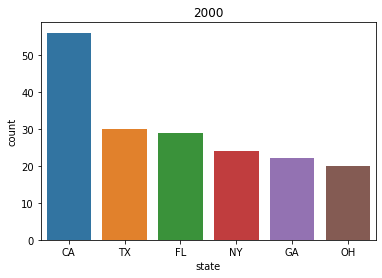

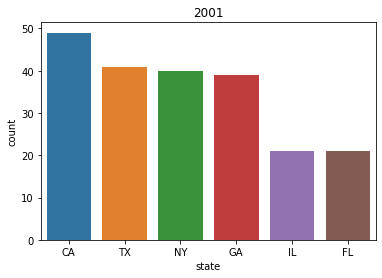

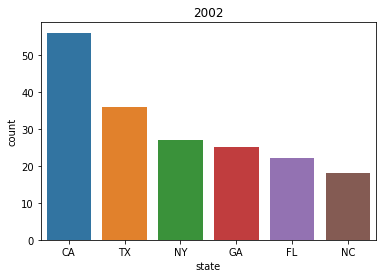

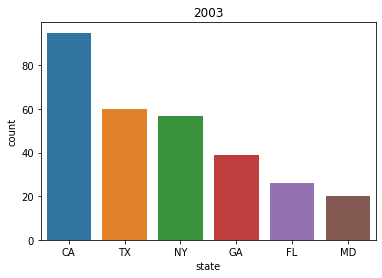

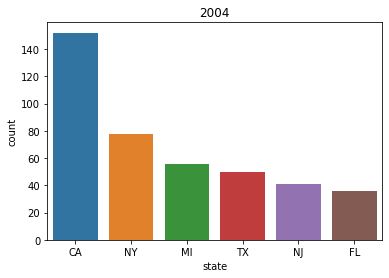

In [212]:
for i in range(2000,2005):
    temp = group[group['year'] == i].sort_values(by=['count'], ascending=False).head(6)
    plt.figure()
    ax = sns.barplot(x="state", y="count", data=temp).set_title(i)

In [ ]:
g = sns.FacetGrid(df, row="variable", hue="segment",
                  palette="Set3", size=4, aspect=2)
g.map(sns.barplot, 'interval', 'value', order=times)